# 가구당 가구원 수와 인구, CCTV 관계 분석(2018년 자료 기준)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 2018년 서울시 가구원수별 가구수(구별) 통계

In [2]:
household_Seoul = pd.read_csv('./data/household_Seoul.csv', delimiter='\t', header=1)

In [3]:
del household_Seoul['기간']
household_Seoul.drop([0], inplace=True)
household_Seoul.rename(columns={household_Seoul.columns[0] : '구별'}, inplace=True)
household_Seoul = household_Seoul.set_index('구별').reset_index()

In [4]:
for i in range(25):
    household_Seoul['일반가구수'][i] = int(household_Seoul['일반가구수'][i].replace(',', ''))
    household_Seoul['1인'][i] = int(household_Seoul['1인'][i].replace(',', ''))
    household_Seoul['2인'][i] = int(household_Seoul['2인'][i].replace(',', ''))
    household_Seoul['3인'][i] = int(household_Seoul['3인'][i].replace(',', ''))
    household_Seoul['4인'][i] = int(household_Seoul['4인'][i].replace(',', ''))
    household_Seoul['5인'][i] = int(household_Seoul['5인'][i].replace(',', ''))
    household_Seoul['6인'][i] = int(household_Seoul['6인'][i].replace(',', ''))
    household_Seoul['7인 이상'][i] = int(household_Seoul['7인 이상'][i].replace(',', ''))
household_Seoul.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,종로구,63773,25326,15957,11241,8286,2228,573,162,2.2
1,중구,53102,20803,14101,9601,6463,1591,433,110,2.2
2,용산구,92500,34240,24574,17717,12098,3019,681,171,2.2
3,성동구,123963,40706,32135,26002,19548,4273,1035,264,2.3
4,광진구,148735,56337,35093,28596,22354,4947,1079,329,2.3


In [5]:
household_Seoul['1인가구비율'] = household_Seoul['1인'] / household_Seoul['일반가구수'] * 100
household_Seoul['4인 이상'] = household_Seoul['4인'] + household_Seoul['5인'] + household_Seoul['6인'] + household_Seoul['7인 이상']
household_Seoul.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상
0,종로구,63773,25326,15957,11241,8286,2228,573,162,2.2,39.7127,11249
1,중구,53102,20803,14101,9601,6463,1591,433,110,2.2,39.1755,8597
2,용산구,92500,34240,24574,17717,12098,3019,681,171,2.2,37.0162,15969
3,성동구,123963,40706,32135,26002,19548,4273,1035,264,2.3,32.8372,25120
4,광진구,148735,56337,35093,28596,22354,4947,1079,329,2.3,37.8774,28709


### CCTV 통계와 2018년 서울시 인구 통계

In [6]:
cctv = pd.read_csv('refined_CCTV.csv')
population = pd.read_csv('./data/pop_2018.csv', delimiter='\t', header=2)[['자치구', '계', '계.1', '계.2', '65세이상고령자']] 
population.rename(columns={population.columns[0] : '구별', population.columns[1] : '인구수', population.columns[2] : '한국인', population.columns[3] : '외국인', population.columns[4] : '고령자'}, inplace=True)
population.drop([0], inplace=True)

In [7]:
for i in range(1, 26):
    population['인구수'][i] = int(population['인구수'][i].replace(',', ''))
    population['한국인'][i] = int(population['한국인'][i].replace(',', ''))
    population['외국인'][i] = int(population['외국인'][i].replace(',', ''))
    population['고령자'][i] = int(population['고령자'][i].replace(',', ''))

In [8]:
population['고령자비율'] = population['고령자'] / population['인구수'] * 100
population['외국인비율'] = population['외국인'] / population['인구수'] * 100
population.head()

,구별,인구수,한국인,외국인,고령자,고령자비율,외국인비율
1,종로구,163026,153065,9961,26742,16.4035,6.11007
2,중구,135633,125725,9908,22005,16.2239,7.30501
3,용산구,245090,228999,16091,37640,15.3576,6.56534
4,성동구,316463,308221,8242,42767,13.5141,2.60441
5,광진구,371063,355559,15504,45619,12.2941,4.17827


### 데이터 merge

In [9]:
cctv_hh = pd.merge(cctv, household_Seoul, on='구별').reset_index().set_index('구별')
pop_hh = pd.merge(population, household_Seoul, on='구별').reset_index().set_index('구별')

In [10]:
#del pop_hh['Unnamed: 0']
del pop_hh['index']

In [11]:
del cctv_hh['index']
del cctv_hh['Unnamed: 0']
del cctv_hh['2011년 이전']
del cctv_hh['2012년']
del cctv_hh['2013년']
del cctv_hh['2014년']
del cctv_hh['2015년']
del cctv_hh['2016년']
del cctv_hh['2017년']
del cctv_hh['2018년']

In [12]:
cctv_hh.head()

,소계,최근증가율,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상
구별,,,,,,,,,,,,,
강남구,5221,52.171379,203083,62727,50076,43542,36572,8063,1664,439,2.4,30.8874,46738
강동구,1879,82.960078,159233,42126,41450,36503,30197,7084,1468,405,2.5,26.4556,39154
강북구,1265,83.068017,127551,40872,34781,26543,19222,4748,1077,308,2.3,32.0437,25355
강서구,1617,77.887789,235754,73011,62155,50204,39017,9061,1807,499,2.4,30.9691,50384
관악구,3985,99.150425,236761,112733,54106,35925,25997,6172,1451,377,2.0,47.6147,33997


In [13]:
pop_hh.head()

,인구수,한국인,외국인,고령자,고령자비율,외국인비율,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상
구별,,,,,,,,,,,,,,,,,
종로구,163026,153065,9961,26742,16.4035,6.11007,63773,25326,15957,11241,8286,2228,573,162,2.2,39.7127,11249
중구,135633,125725,9908,22005,16.2239,7.30501,53102,20803,14101,9601,6463,1591,433,110,2.2,39.1755,8597
용산구,245090,228999,16091,37640,15.3576,6.56534,92500,34240,24574,17717,12098,3019,681,171,2.2,37.0162,15969
성동구,316463,308221,8242,42767,13.5141,2.60441,123963,40706,32135,26002,19548,4273,1035,264,2.3,32.8372,25120
광진구,371063,355559,15504,45619,12.2941,4.17827,148735,56337,35093,28596,22354,4947,1079,329,2.3,37.8774,28709


### 상관관계 분석

In [ ]:
'''df_a = df[['A', 'B', 'C']]
df_corr = df_a.corr()
df_corr'''

In [14]:
np.corrcoef(cctv_hh['소계'], cctv_hh['1인가구비율'].astype(float))

array([[1.        , 0.04947905],
       [0.04947905, 1.        ]])

In [15]:
np.corrcoef(cctv_hh['소계'], cctv_hh['4인 이상'].astype(float))

array([[1.       , 0.2971908],
       [0.2971908, 1.       ]])

In [16]:
np.corrcoef(cctv_hh['최근증가율'], cctv_hh['1인가구비율'].astype(float))

array([[1.        , 0.29950535],
       [0.29950535, 1.        ]])

In [17]:
np.corrcoef(pop_hh['고령자비율'].astype(float), pop_hh['1인가구비율'].astype(float))

array([[1.        , 0.21783845],
       [0.21783845, 1.        ]])

In [18]:
np.corrcoef(pop_hh['외국인비율'].astype(float), pop_hh['1인가구비율'].astype(float))

array([[1.        , 0.58151945],
       [0.58151945, 1.        ]])

In [19]:
np.corrcoef(pop_hh['고령자비율'].astype(float), pop_hh['4인 이상'].astype(float))

array([[ 1.        , -0.58364137],
       [-0.58364137,  1.        ]])

### 1인가구비율과 외국인비율 순 정렬 시각화

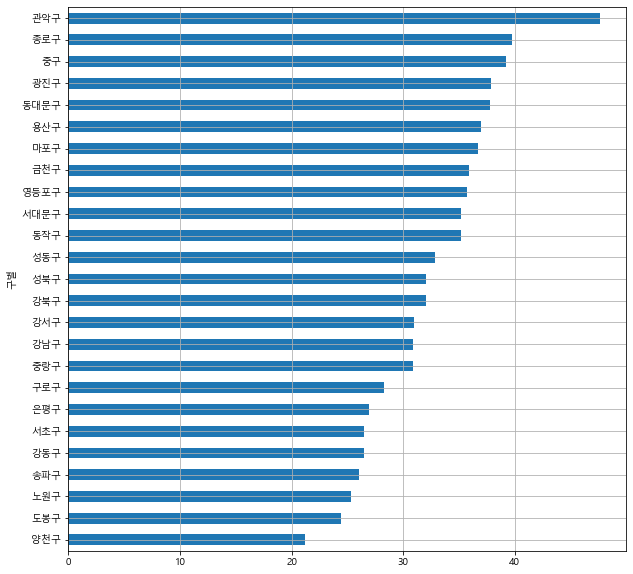

In [20]:
pop_hh['1인가구비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

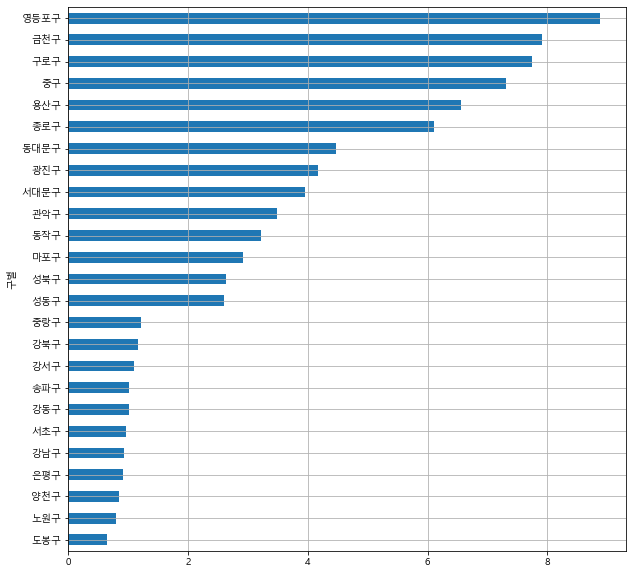

In [21]:
pop_hh['외국인비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

## 상관관계 시각화

### 외국인비율과 1인가구비율 상관관계

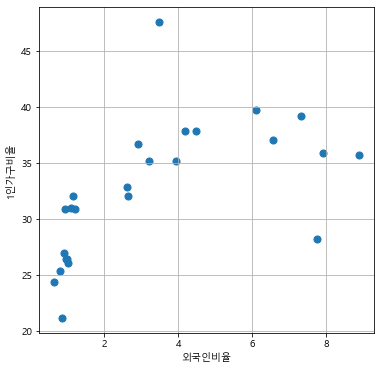

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(pop_hh['외국인비율'], pop_hh['1인가구비율'], s=50)
plt.xlabel('외국인비율')
plt.ylabel('1인가구비율')
plt.grid()
plt.show()

In [23]:
fp1 = np.polyfit(pop_hh['외국인비율'].astype(float), pop_hh['1인가구비율'].astype(float), 1)

f1 = np.poly1d(fp1)
fx = np.linspace(0, 10, 100)

pop_hh['외국인1인오차'] = np.abs(pop_hh['1인가구비율'] - f1(pop_hh['외국인비율']))

df_sort1 = pop_hh.sort_values(by='외국인1인오차', ascending=False)
df_sort1.head()

,인구수,한국인,외국인,고령자,고령자비율,외국인비율,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상,외국인1인오차
구별,,,,,,,,,,,,,,,,,,
관악구,520040,501957,18083,72249,13.893,3.47723,236761,112733,54106,35925,25997,6172,1451,377,2.0,47.6147,33997,14.8777
구로구,438486,404497,33989,61801,14.0942,7.75144,156235,44151,41836,34633,27310,6479,1425,401,2.5,28.2594,35615,10.0975
양천구,468145,464185,3960,58045,12.3989,0.845892,162039,34304,40185,41534,36359,7768,1502,387,2.7,21.1702,46016,8.10697
마포구,386359,375077,11282,50833,13.1569,2.92008,154940,56837,38861,29938,22671,5233,1108,292,2.3,36.6832,29304,4.67882
도봉구,341649,339413,2236,55964,16.3806,0.654473,126286,30848,35343,30077,23237,5292,1146,343,2.5,24.4271,30018,4.59841


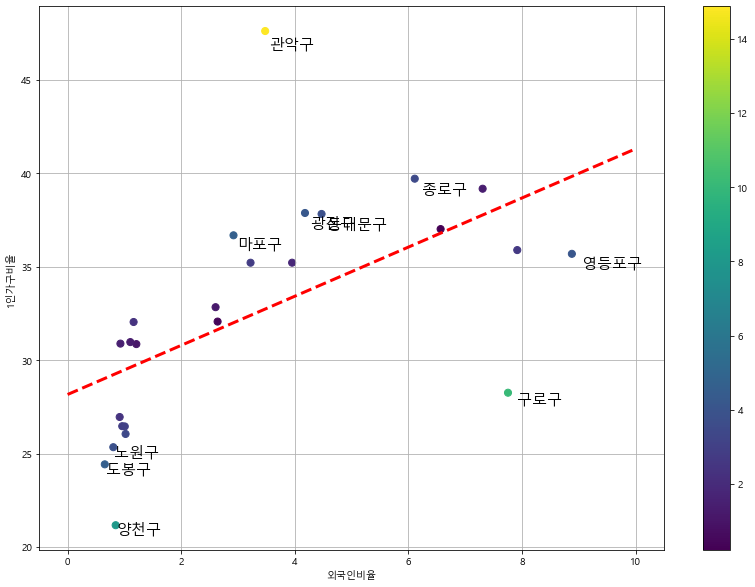

In [24]:
plt.figure(figsize=(14, 10))
plt.scatter(pop_hh['외국인비율'], pop_hh['1인가구비율'], c=pop_hh['외국인1인오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')

for n in range(10):
    plt.text(df_sort1['외국인비율'][n] * 1.02, df_sort1['1인가구비율'][n] * 0.98, df_sort1.index[n], fontsize=15)

plt.xlabel('외국인비율')
plt.ylabel('1인가구비율')

plt.colorbar()
plt.grid()
plt.show()

### 고령자비율과 4인 이상 가구 수 상관관계

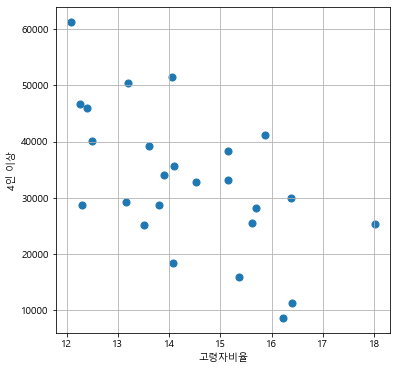

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(pop_hh['고령자비율'], pop_hh['4인 이상'], s=50)
plt.xlabel('고령자비율')
plt.ylabel('4인 이상')
plt.grid()
plt.show()

In [26]:
fp2 = np.polyfit(pop_hh['고령자비율'].astype(float), pop_hh['4인 이상'].astype(float), 1)

f2 = np.poly1d(fp2)
fx2 = np.linspace(11, 19, 100)

pop_hh['고령자4인오차'] = np.abs(pop_hh['4인 이상'] - f2(pop_hh['고령자비율']))

df_sort2 = pop_hh.sort_values(by='고령자4인오차', ascending=False)
df_sort2.head()

,인구수,한국인,외국인,고령자,고령자비율,외국인비율,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상,외국인1인오차,고령자4인오차
구별,,,,,,,,,,,,,,,,,,,
송파구,673507,666635,6872,81364,12.0806,1.02033,243547,63451,61970,56824,48156,10366,2235,545,2.5,26.0529,61302,3.45367,17534.9
노원구,548160,543752,4408,77096,14.0645,0.804145,202326,51280,51939,47672,40995,8517,1542,381,2.6,25.3452,51435,3.87706,16978.3
금천구,254021,233917,20104,35739,14.0693,7.91431,96298,34564,24305,18948,14102,3388,769,222,2.3,35.8927,18481,2.67825,15953.2
중구,135633,125725,9908,22005,16.2239,7.30501,53102,20803,14101,9601,6463,1591,433,110,2.2,39.1755,8597,1.40568,15725.5
은평구,487666,483197,4469,77420,15.8756,0.916406,181338,48888,50617,40750,31086,7833,1682,482,2.5,26.9596,41083,2.4103,15125.9


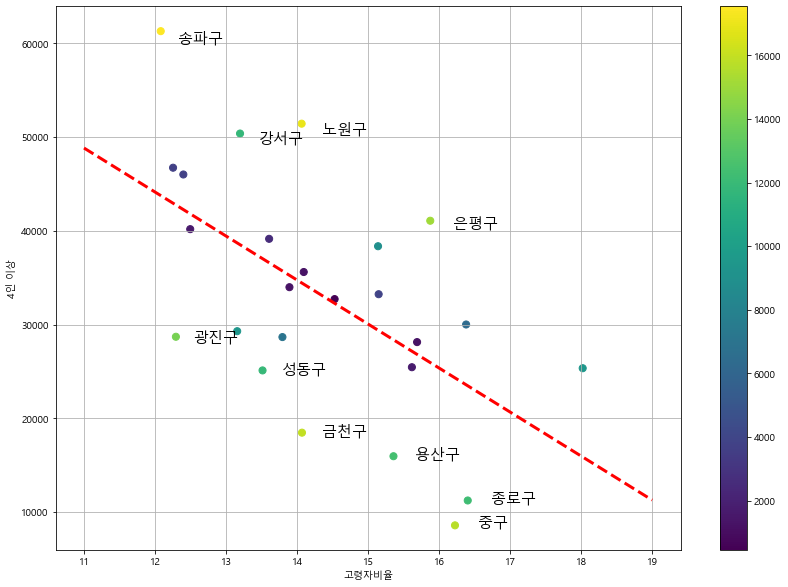

In [27]:
plt.figure(figsize=(14, 10))
plt.scatter(pop_hh['고령자비율'], pop_hh['4인 이상'], c=pop_hh['고령자4인오차'], s=50)
plt.plot(fx2, f2(fx2), ls='dashed', lw=3, color='r')

for n in range(10):
    plt.text(df_sort2['고령자비율'][n] * 1.02, df_sort2['4인 이상'][n] * 0.98, df_sort2.index[n], fontsize=15)

plt.xlabel('고령자비율')
plt.ylabel('4인 이상')

plt.colorbar()
plt.grid()
plt.show()

### CCTV 최근 증가율과 1인가구비율 상관관계

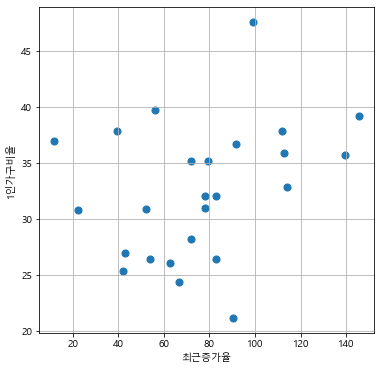

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(cctv_hh['최근증가율'], cctv_hh['1인가구비율'], s=50)
plt.xlabel('최근증가율')
plt.ylabel('1인가구비율')
plt.grid()
plt.show()

In [29]:
fp3 = np.polyfit(cctv_hh['최근증가율'].astype(float), cctv_hh['1인가구비율'].astype(float), 1)

f3 = np.poly1d(fp3)
fx3 = np.linspace(10, 160, 100)

cctv_hh['증가율1인오차'] = np.abs(cctv_hh['1인가구비율'] - f3(cctv_hh['최근증가율']))

df_sort3 = cctv_hh.sort_values(by='증가율1인오차', ascending=False)
df_sort3.head()

,소계,최근증가율,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인가구비율,4인 이상,증가율1인오차
구별,,,,,,,,,,,,,,
관악구,3985,99.150425,236761,112733,54106,35925,25997,6172,1451,377,2.0,47.6147,33997,13.8439
양천구,2775,90.198766,162039,34304,40185,41534,36359,7768,1502,387,2.7,21.1702,46016,12.1121
종로구,1471,56.323061,63773,25326,15957,11241,8286,2228,573,162,2.2,39.7127,11249,8.27883
용산구,2063,12.058664,92500,34240,24574,17717,12098,3019,681,171,2.2,37.0162,15969,7.99761
도봉구,858,66.601942,126286,30848,35343,30077,23237,5292,1146,343,2.5,24.4271,30018,7.56768


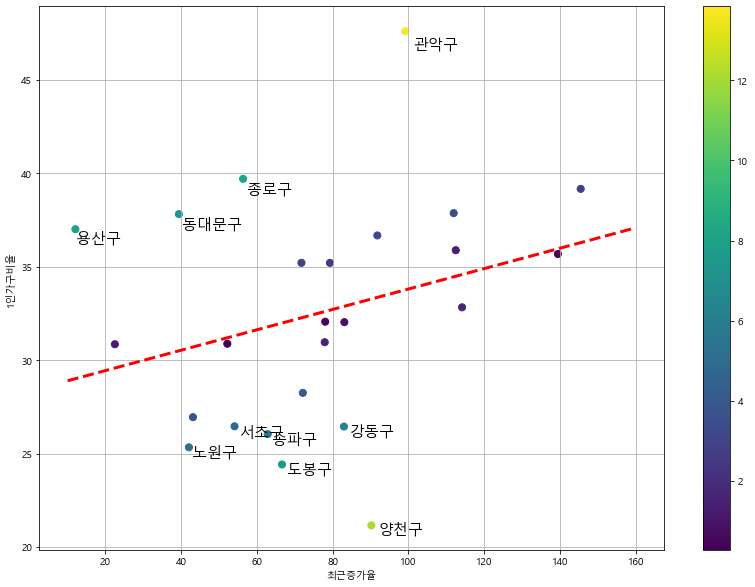

In [30]:
plt.figure(figsize=(14, 10))
plt.scatter(cctv_hh['최근증가율'], cctv_hh['1인가구비율'], c=cctv_hh['증가율1인오차'], s=50)
plt.plot(fx3, f3(fx3), ls='dashed', lw=3, color='r')

for n in range(10):
    plt.text(df_sort3['최근증가율'][n] * 1.02, df_sort3['1인가구비율'][n] * 0.98, df_sort3.index[n], fontsize=15)

plt.xlabel('최근증가율')
plt.ylabel('1인가구비율')

plt.colorbar()
plt.grid()
plt.show()